# Introduction:
Google Play Store is a digital distribution service developed by google to allow users to
browse and download applications developed with android software and published
through google. I’m interested in studying and analyzing a dataset of google play store
apps.

# Research Question:
1. What category of apps are most prevalent among teenagers.
2. How business apps compared to lifestyle apps according to the size.
3. What is the relationship between size of app (as independent variable) and
rating of app as outcome variable.
4. Measure the performance of the users reviews sentiment analysis.

# Dataset ( Description and summary):
Google play store apps dataset from kaggle website source :
https://www.kaggle.com/lava18/google-play-store-apps/discussion/103760
Is a dataset collected by Lavanya Gubta . The dataset organized on CSV file contains 17
features . This multivariate structured dataset contains records of 10841 apps in google
play store app ,each record has a unique name.


In [1]:
#import the library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the data 
data=pd.read_csv("googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Data preprocessing:

# 1. Remove nan values:

In [5]:
data=data.dropna(how='any',axis=0)

# 2.Remove duplicated rows.

In [7]:
data.drop_duplicates(subset=['App'],keep=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NAN,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


## 3. Replace value:
A. Variable size: there are values like ‘100,00+’ ,’100M’, and ‘1000k’ , therefore ,I
replace the character of ‘,’ ‘+’ ‘M’ ‘K’ with ‘ ’ so it is better when converting
from string to number.


In [4]:
data["Size"] = data["Size"].apply(lambda x: str(x).replace(",", "") if "," in str(x) else x)
data["Size"] = data["Size"].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data["Size"] = data["Size"].apply(lambda x: str(x).replace("Varies with device", "NAN") if "Varies with device" in str(x) else x)
data["Size"] = data["Size"].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
data["Size"] = data["Size"].apply(lambda x:x.replace("+","")if "+" in str(x) else x)

#convert size to float and replace 'NAN' in size column with mean of the column

In [8]:
data["Size"] = data["Size"].apply(lambda x:float(x))
data["Size"].fillna((data["Size"].mean()), inplace=True)

## Q1) what category of apps is most prevalent among tenager


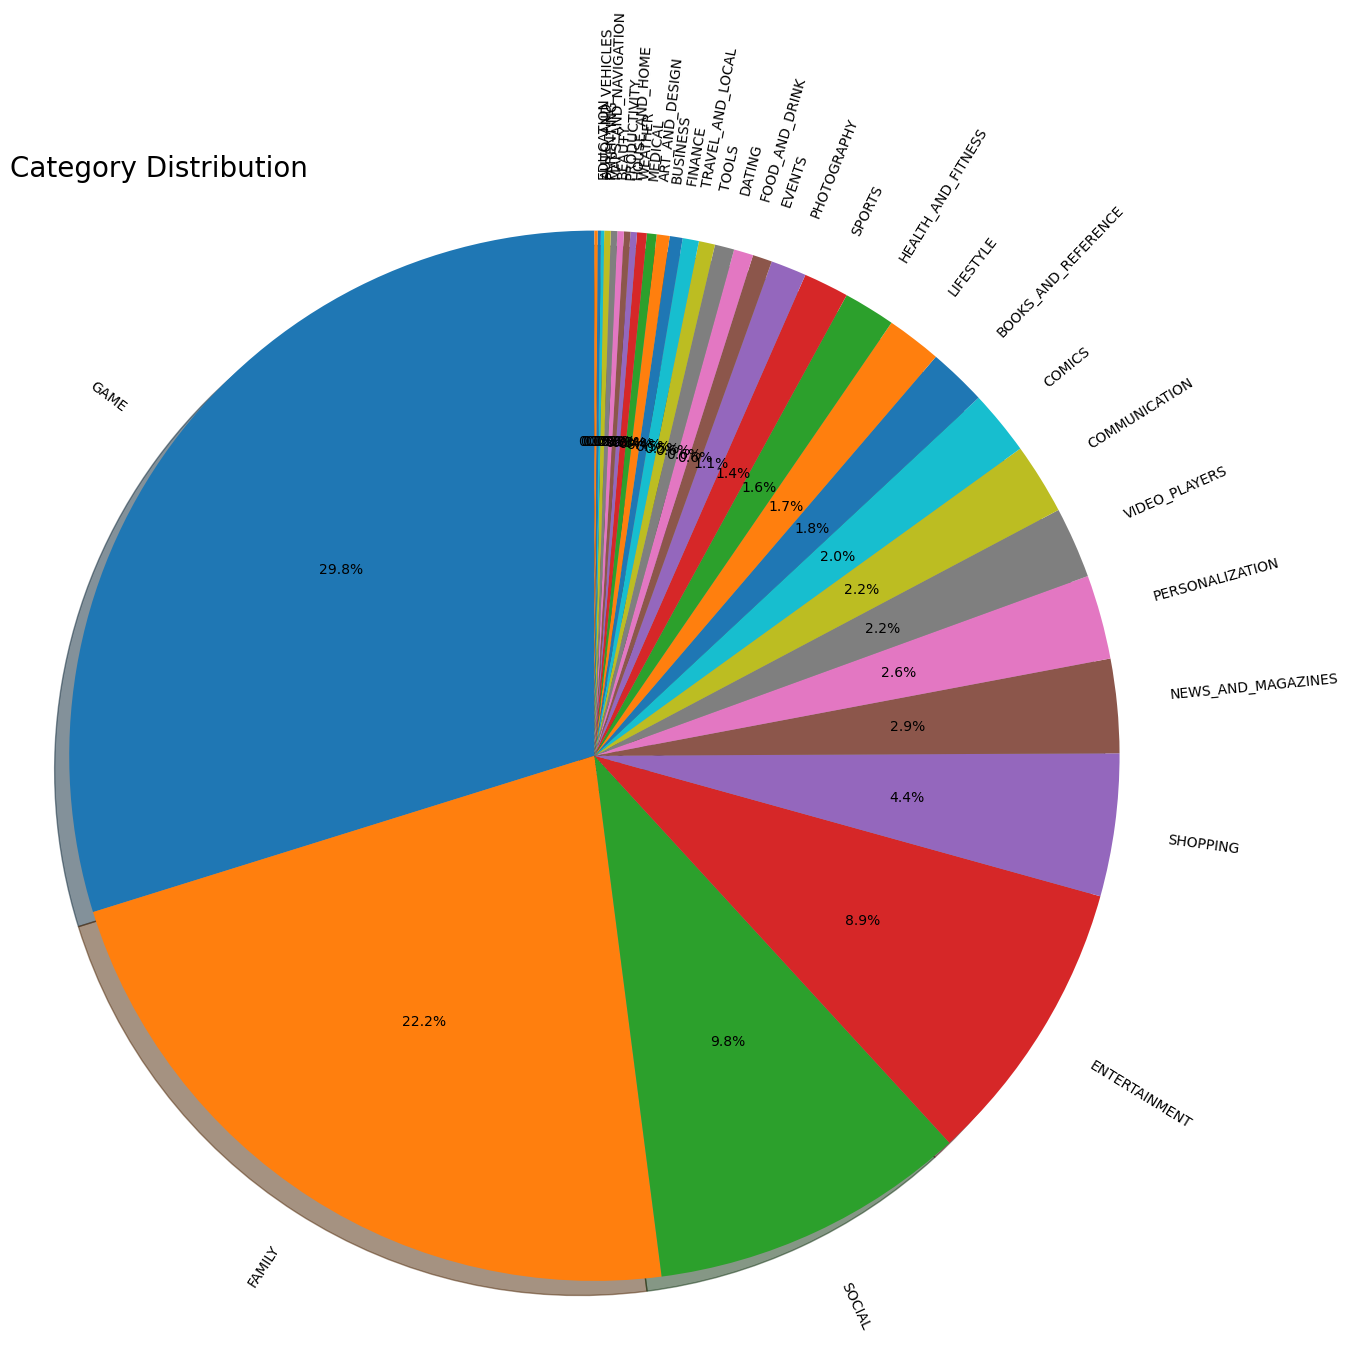

In [9]:
data1=data.loc[data['Content Rating']=='Teen']
#draw pie chart of category and content
labels = data1['Category'].value_counts().index.tolist()
sizes = [round(item,3) for item in list(data1['Category'].value_counts()/data1.shape[0])]      
fig1, ax1 = plt.subplots(figsize = (15,15))
ax1.pie(sizes , labels=labels, rotatelabels=True,autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')#ensures that pie is drawn as a circle.
plt.title("Category Distribution",size = 20,loc = "left")
plt.show()

The result shows that the game is the most prevalent category of apps
among teens by 29.8%.


## Q2)How bussiness apps compared to lifestyle apps according to 
draw bar chart to represent the size of each gategory

In [10]:
Size=data["Size"]
Category=data['Category']
fig=plt.figure(figsize=(100,100))
ax=fig.add_subplot(111)
rect1=ax.bar(Category,Size,align='center')
plt.xticks(rotation=90,ha='right',fontsize=100)
plt.show()

● The bar chart shows that lifestyle apps are larger in size than business apps.

## #Q3)What is the relationship between size of app (as independent variable) and rating of app as outcome variable.

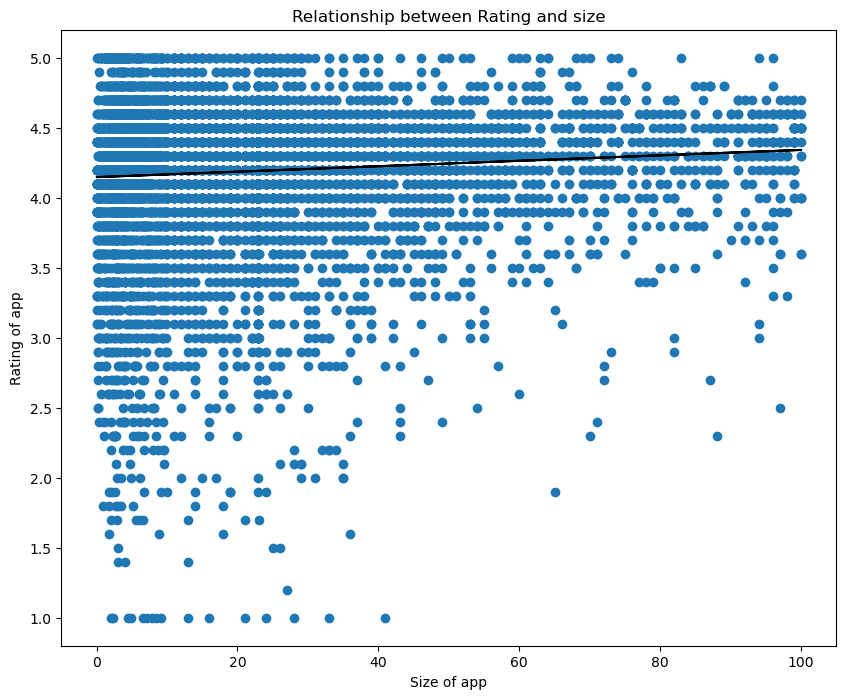

weight of X in regression model 0.0019426500553753837
bias term =  4.147214702424731
correlation coefficient:  [[1.        0.0803078]
 [0.0803078 1.       ]]


In [11]:
#build regression model
x=data['Size']
y=data['Rating']
plt.figure(figsize=(10,8))
plt.scatter(x,y)
theta1,theata0=np.polyfit(x,y,1)
plt.plot(x,theta1*x + theata0,color='black')
plt.ylabel('Rating of app')
plt.xlabel('Size of app')
plt.title('Relationship between Rating and size')
plt.show()
print("weight of X in regression model",theta1)
print("bias term = ", theata0)
print('correlation coefficient: ',np.corrcoef(x,y))

From the graph above , I can see that there is a week relationship between the size of app and it's rating.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
#load data from the seconed file 
df1 = pd.read_csv('googleplaystore_user_reviews.csv')

In [16]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [17]:
#drop null values
data2=df1.dropna(how='any',axis=0)

In [18]:
x=data2["Translated_Review"]
y=data2["Sentiment"]

## Q4)  Measure the performance of the users reviews sentiment analysis.

In [19]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
X_train_raw, X_test_raw, y_train, y_test =train_test_split(x, y, test_size=0.2,shuffle=False)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
X_test = vectorizer.transform( X_test_raw  )
predictions = classifier.predict(X_test)
print(predictions)

C:\Users\mayaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[2 2 1 ... 0 2 0]


In [20]:
#calculate the accuracy
score=classifier.score(X_test ,y_test)
print("The accuracy of logistic regression: ",score)

The accuracy of logistic regression:  0.8831151482767833


The accuracy of logistic regression is 88% , meaning that the model predicts
the Sentiment correctly by 88%.

the sentiment function of test returns two properties , polarity and subjectivity the clustering of this properties:

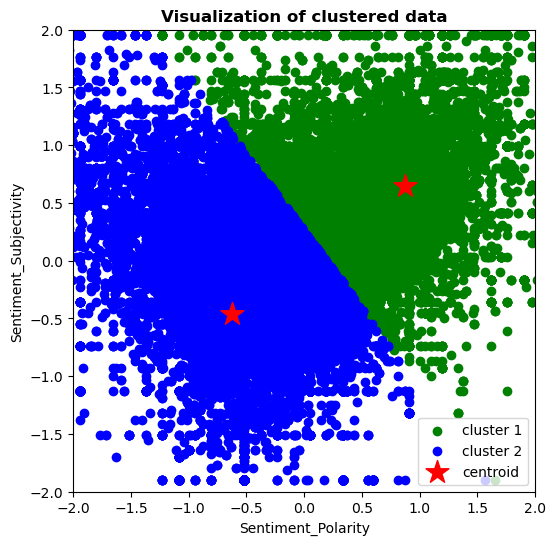

In [21]:
#clustring
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Standardize the data
df =  df1.iloc[:, 3:5]
#dropping the rows which has null value 
final = df.dropna(how='any',axis=0)
X_std = StandardScaler().fit_transform(final)
# Run local implementation of kmeans
km = KMeans()
km = KMeans(n_clusters=2, max_iter=1000)
km.fit(X_std)
centroids = km.cluster_centers_
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label ='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label ='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Sentiment_Polarity')
plt.ylabel('Sentiment_Subjectivity')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')
plt.show()

# Conclusion

In conclusion, there is an accelerated increase in the number of apps in google play store. Depending on the results obtained, I expect to see more gaming apps that target teens in
particular. I hope to do future analysis on the dataset and perform better results .